# Анализ убытков приложения ProcrastinatePRO+.

Найдите и изучите пропущенные значения в столбцах:

1.Определите, в каких столбцах есть пропуски.

2. Рассмотрите типы данных в каждом столбце:

-Найдите столбцы, в которых нужно изменить тип данных.

-Преобразуйте тип данных в выбранных столбцах.

-Приведите столбцы к нужному регистру.

-В ячейке с типом markdown поясните, почему нужно изменить тип данных.

3. Проверьте данные на наличие выбросов и аномалий.

Проведите исследовательский анализ данных:
1. Определите максимальую и минимальную даты привлечения
2. Вычислите количество платящих и неплатящих пользователей для каждой страны, канала и устройства.
3. Посчитайте доли для платящих пользователей от неплатящих. 
4. Определите самые популярные каналы и устройства для каждого типа пользователей.

Проведите маркетинговый анализ данных:
1. Составьте профили для пользователей.
2. Посчитайте среднюю стоимость привлечения пользователя для каждого канала.
3. Визуализируйте данные о динамике расходов.
4. Посчитайте общий расход который был у каждого канала отдельно.

Оцените окупаемость рекламы:

1.Определите показатели LTV, ROI и CAC для каждого канала, устройства и региона.

2. Определите показатели конверсии и удержания для каждого канала , устройства и региона.

3. Постройте графики по этим показателям.

4. Напишите выводы по этим показателям.


Составьте общие выводы о проведенном исследовании и рекомендации для отдела маркетинга.



### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.


Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Получить данные.

In [2]:
data_visits = pd.read_csv('visits.csv')
data_orders = pd.read_csv('orders.csv')
data_costs = pd.read_csv('costs.csv')

Привести к нижнему регистру.

In [3]:
data_visits.columns = data_visits.columns.str.lower()
data_orders.columns = data_orders.columns.str.lower()
data_costs.columns = data_costs.columns.str.lower()

Переименовать поля.

In [4]:
data_visits = data_visits.rename(columns = {'user id':'user_id','session start':'session_start','session end':'session_end'})
data_orders = data_orders.rename(columns = {'user id':'user_id','event dt':'event_dt'})

Изменить тип данных для времени.

In [5]:
data_visits['session_start'] = pd.to_datetime(data_visits['session_start'])
data_visits['session_end'] = pd.to_datetime(data_visits['session_end'])
data_orders['event_dt'] = pd.to_datetime(data_orders['event_dt'])
data_costs['dt'] = pd.to_datetime(data_costs['dt'])

Проверить типы данных.

In [6]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Проверить пропуски.

In [9]:
print(data_visits.isna().sum(),data_orders.isna().sum(),data_costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64 user_id     0
event_dt    0
revenue     0
dtype: int64 dt         0
channel    0
costs      0
dtype: int64


Проверить выбросы.

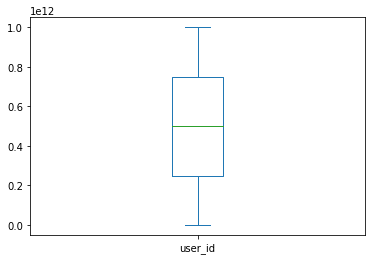

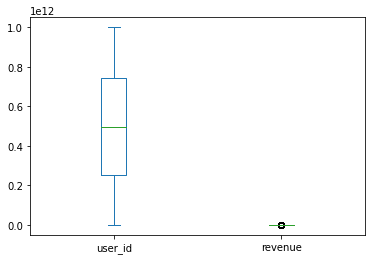

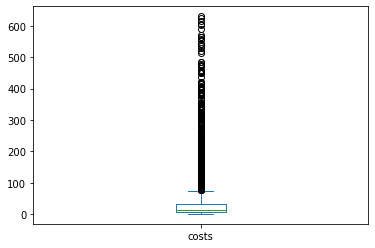

In [10]:
data_visits.plot(kind="box")
data_orders.plot(kind="box")
data_costs.plot(kind = "box");

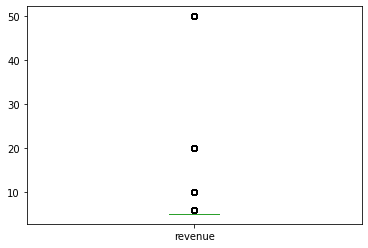

In [11]:
data_orders['revenue'].plot(kind="box");

In [12]:
data_orders['revenue'].value_counts().head()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

113.3    1
213.2    1
187.2    1
176.8    1
236.6    1
273.0    1
288.6    1
252.2    1
231.4    1
301.6    1
345.8    1
387.4    1
343.2    1
322.4    1
405.6    1
325.0    1
338.0    1
258.4    1
262.2    1
286.9    1
Name: costs, dtype: int64

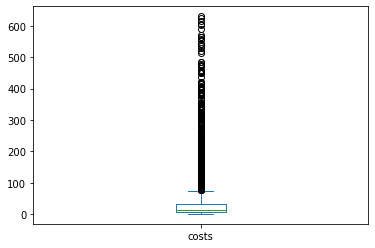

In [13]:
data_costs['costs'].plot(kind="box")
data_costs['costs'].value_counts(ascending=True).head(20)

Проверить на дубликаты.

In [14]:
print('Дубликаты visits:', *data_visits.duplicated().unique(), '\n',
'Дубликаты orders:', *data_orders.duplicated().unique(),'\n',
'Дубликаты costs:', *data_costs.duplicated().unique(),)

Дубликаты visits: False 
 Дубликаты orders: False 
 Дубликаты costs: False


Проверить на пропуски.

In [15]:
print(data_visits.isna(),
data_orders.isna(),
data_costs.isna())

        user_id  region  device  channel  session_start  session_end
0         False   False   False    False          False        False
1         False   False   False    False          False        False
2         False   False   False    False          False        False
3         False   False   False    False          False        False
4         False   False   False    False          False        False
...         ...     ...     ...      ...            ...          ...
309896    False   False   False    False          False        False
309897    False   False   False    False          False        False
309898    False   False   False    False          False        False
309899    False   False   False    False          False        False
309900    False   False   False    False          False        False

[309901 rows x 6 columns]        user_id  event_dt  revenue
0        False     False    False
1        False     False    False
2        False     False    False
3        

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Задать функцию для создания профилей.

In [16]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Определить минимальную и максимальную даты привлечения пользователей.

In [17]:
min_analysis_date = data_costs['dt'].min()
observation_date = data_costs['dt'].max()
print("Минимальная дата привлечения : ", min_analysis_date, '\n',
      "Максимальная дата привлечения : ", observation_date)


Минимальная дата привлечения :  2019-05-01 00:00:00 
 Максимальная дата привлечения :  2019-10-27 00:00:00


Первый пользователь был зарегистрирован в 0 часов 0 минут, последний-также,
что говорит о достоверности информации о времени , также можно сделать вывод , что период 
с расчетом , который мы используем в исследовании начинался с 5 месяца 2019 года по 10 месяц того же года, 
а именно 27 октября.

Выяснить из каких стран пользователи приходят в приложение.

In [18]:
country_users  = data_visits.groupby('region').agg({'user_id': 'nunique'}).reset_index()

display(country_users)

,region,user_id
0,France,17450
1,Germany,14981
2,UK,17575
3,United States,100002


Больше всего пользователей из страны Unated States.

Выяснить на какую страну приходится больше всего платящих пользователей.

In [19]:
data_order=data_orders.merge(
data_visits[['user_id', 'region']], on = 'user_id', how = 'left')
data_order
data_order = data_order.groupby('region').agg({'user_id':'nunique'}).reset_index()
data_order = data_order.rename(columns={'region_x':'region'}).sort_values(by = 'region',ascending = False)
display(data_order)

,region,user_id
3,United States,6902
2,UK,700
1,Germany,616
0,France,663


Больше всего платящих пользователей приходится на страну USA.

Построить таблицу в которой отразить количество платящих и неплатящих пользователей по странам.

In [20]:
data_order = data_order.merge(
country_users[['region', 'user_id']], on = 'region', how = 'left')\
.rename(columns ={'user_id_y':'attracted_users', 'user_id_x':'paying_users'})
data_order


,region,paying_users,attracted_users
0,United States,6902,100002
1,UK,700,17575
2,Germany,616,14981
3,France,663,17450


В 26 раз больше неплатящих пользователей чем платящих в Франции , в 24 раза больше не плятящих чем платящих в Германии,
в 25 раз больше неплатящих чем платящих в Великобритании , и всего лишь в 14 раз больше неплятщих, чем платящих пользователей
в Америке. То есть самым лчшим показателем может быть считаться американский показатель: каждый 15 пользователей становится 
потенциальным покупателем.

Добавить столбец с долями платящих от привлеченных.

In [21]:
data_order['share_of_paying'] = round(100 * (data_order['paying_users'] / data_order['attracted_users']), 2)
data_order

,region,paying_users,attracted_users,share_of_paying
0,United States,6902,100002,6.90
1,UK,700,17575,3.98
2,Germany,616,14981,4.11
3,France,663,17450,3.80


Доля платящих от неплатящих в Америке самая высокая, что снова подтверждает лидерство американского показателя, только в этот
раз не с помощью подсчета по делению одних показателей на другие, а с помощью подсчета процентного соотношения.

Узнать какими утройствами пользуются пользователи.

In [22]:
data_vis =data_visits.groupby('device').agg({'user_id':'nunique'}).reset_index()
data_vis

,device,user_id
0,Android,36377
1,Mac,31335
2,PC,31681
3,iPhone,55798


Больше всего пользователей пользуются айфонами, притом все остальные показатели находятся в диапазоне от 31 до 36 тысяч,
что меньше чем разрыв между айфонами и андроидами, а именно один показатель : 5 тысяч , а другой: 19. 

Узнать какими устройствами пользуются платящие пользователи.

In [23]:
data_device = data_orders.merge(
data_visits[['device', 'user_id']], on = 'user_id', how = 'left')

paying_devices = data_device.groupby('device').agg({'user_id':'nunique'}).reset_index()
paying_devices

,device,user_id
0,Android,2458
1,Mac,2346
2,PC,1947
3,iPhone,3768


Вполне логично , что люди, которые чаще которые заходят чем другие, также чаще совершают покупки, количественным показатель 
лидирует: держатели айфонов чаще совершают покупки , показатель покупок со всех других устройств превышает количество 
покупок с айфона всего ли на 1,8 раз, то есть это даже не в 2 раза, что говорит о явном лидерстве держателей айфонов.

Построить таблицу в которой отразить количество платящих и неплатящих пользователей по странам.

In [24]:
data_dev = data_vis.merge(
paying_devices[['device', 'user_id']], on = 'device', how = 'left').\
rename(columns ={'user_id_y':'paying_users', 'user_id_x':'attracted_users'}).\
sort_values(by = 'attracted_users',ascending = False)
data_dev

,device,attracted_users,paying_users
3,iPhone,55798,3768
0,Android,36377,2458
2,PC,31681,1947
1,Mac,31335,2346


Неплатящих пользователей больше всего у держателей iPhone.

Определить долю платящих пользователей от привлеченных для каждого устройства.

In [25]:
data_dev['share_of_paying'] = round(100 * (data_dev['paying_users'] / data_dev['attracted_users']), 2)
data_dev

,device,attracted_users,paying_users,share_of_paying
3,iPhone,55798,3768,6.75
0,Android,36377,2458,6.76
2,PC,31681,1947,6.15
1,Mac,31335,2346,7.49


Показатель держателей айфонов и показатель держателей андроидов идентичен , что говорит о заинтересованности держателей
айфонов и андроидов в продаваемом продукте.

Установить какие каналы для привлечения самые популярные.

In [26]:
dat_channel = data_visits.groupby('channel').agg({'user_id': 'nunique'}).reset_index()\
.sort_values(by = 'user_id', ascending = False)
dat_channel

,channel,user_id
10,organic,57673
1,FaceBoom,29916
6,TipTop,20204
4,OppleCreativeMedia,8929
2,LeapBob,8875
7,WahooNetBanner,8845
5,RocketSuperAds,4988
3,MediaTornado,4895
8,YRabbit,4882
0,AdNonSense,4199


Самые популярные каналы FaceBoom и TipTop. Они лидируют на более чем 10 тысяч пользователей.

Изучить через какие каналы чаще всего привлекались платящие пользователи.

In [27]:
dat_pay = data_visits.merge(
data_orders['user_id'], on = 'user_id', how = 'right')
dat_pay = dat_pay.groupby('channel').agg({'user_id':'nunique'}).reset_index()
dat_pay


,channel,user_id
0,AdNonSense,556
1,FaceBoom,3832
2,LeapBob,365
3,MediaTornado,392
4,OppleCreativeMedia,336
5,RocketSuperAds,558
6,TipTop,2054
7,WahooNetBanner,538
8,YRabbit,380
9,lambdaMediaAds,323


Больше всего платящих пользователей привлекли такие каналы как FaceBoom и TipTop.

Посчитать долю платящих пользователей от неплатящих для каждого канала.

In [28]:
dat_channels = dat_channel.merge(
dat_pay[['user_id','channel']], on = 'channel', how = 'left').\
rename(columns ={'user_id_x':'non_paying', 'user_id_y':'paying_users'})
dat_channels

,channel,non_paying,paying_users
0,organic,57673,1436
1,FaceBoom,29916,3832
2,TipTop,20204,2054
3,OppleCreativeMedia,8929,336
4,LeapBob,8875,365
5,WahooNetBanner,8845,538
6,RocketSuperAds,4988,558
7,MediaTornado,4895,392
8,YRabbit,4882,380
9,AdNonSense,4199,556


In [29]:
dat_channels['share_of_paying'] = round(100 * (dat_channels['paying_users'] / dat_channels['non_paying']), 2)
dat_channels.sort_values(by = 'share_of_paying', ascending = False)

,channel,non_paying,paying_users,share_of_paying
10,lambdaMediaAds,2410,323,13.40
9,AdNonSense,4199,556,13.24
1,FaceBoom,29916,3832,12.81
6,RocketSuperAds,4988,558,11.19
2,TipTop,20204,2054,10.17
7,MediaTornado,4895,392,8.01
8,YRabbit,4882,380,7.78
5,WahooNetBanner,8845,538,6.08
4,LeapBob,8875,365,4.11
3,OppleCreativeMedia,8929,336,3.76


Самое лучшее процентное соотношение относиться к таким каналам как AdNonSense,FaceBoom и lambdaMediaAds.

### Создать профили пользователей.

Cохранить горизонт.

In [30]:
horizon_days = 14

Cохранить момент анализа.

In [31]:
observation_date = datetime(2019, 11, 1).date()

#### Вывод по проведенному анализу:

Самым лучшим показателем среди устройств можно определить айфон, а самыми лучшими показателями по стабильности можно
определить как айфоны и анроиды: у них одинаковые показатели соотношения платящих пользователей от неплатящих.
Самые лучшие показатели  относятся к таким каналам как: AdNonSense,FaceBoom и lambdaMediaAds.
Но если еще взять в расчет то, что самое большое количество пользователей привлек канал FaceBoom, то стоит посмотреть
на эти 12, 8 процентов, как на самый высокий показатель каналов.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Выяснить, как траты распределены по рекламным источникам.

In [32]:
spending_by_source = data_costs.pivot_table(values = 'costs',index = 'channel', aggfunc='sum')
spending_by_source

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


Самые высокие показатели у TipTop и FaceBoom . Самый низкий показатель отмечается у YRabbit , он меньше чем 1000.

Посчитать общие расходы для всех каналов.

In [33]:
general_expenses = spending_by_source['costs'].sum().astype('int64')
print('Общие расходы составили:' ,general_expenses)

Общие расходы составили: 105497


Общая трата всех каналов составила 105497, из суммы которой больше половины потратил на привлечение такой канал как TipTop.

Построить визуализацию динамики изменения расходов по месяцам и по неделям для каждого источника.

In [34]:
data_costs['month'] = data_costs['dt'].astype('datetime64[M]')
data_costs['week'] = data_costs['dt'].dt.isocalendar().week
data_costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,18
1,2019-05-02,FaceBoom,78.1,2019-05-01,18
2,2019-05-03,FaceBoom,85.8,2019-05-01,18
3,2019-05-04,FaceBoom,136.4,2019-05-01,18
4,2019-05-05,FaceBoom,122.1,2019-05-01,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-01,43
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-01,43
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-01,43
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-01,43


In [35]:
by_month = data_costs.pivot_table(values = 'costs', index = 'month',  columns = 'channel', aggfunc = 'sum').astype('int64')
by_month

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
2019-05-01,1169,3524,140,238,169,577,2981,418,299,458
2019-06-01,538,5501,314,138,370,325,6675,921,106,199
2019-07-01,504,5294,313,138,366,252,8410,851,97,219
2019-08-01,579,6274,369,154,439,253,11202,1040,124,220
2019-09-01,581,6114,343,144,427,218,13232,977,152,247
2019-10-01,537,5736,315,140,378,205,12250,942,163,213


In [36]:
by_week = data_costs.pivot_table(values = 'costs', index = 'week',  columns = 'channel', aggfunc = 'sum').astype('int64')
by_week

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211,535,16,38,24,99,347,49,52,81
19,273,750,31,61,34,139,470,92,75,103
20,265,755,26,59,27,138,454,90,69,90
21,266,722,26,50,34,131,801,79,65,119
22,202,1208,65,36,81,97,1421,179,49,83
23,102,1081,66,27,79,76,1223,196,25,35
24,96,1042,52,29,71,63,1121,166,17,45
25,141,1280,68,32,79,80,1474,201,22,40
26,148,1647,99,40,107,78,2343,285,27,59


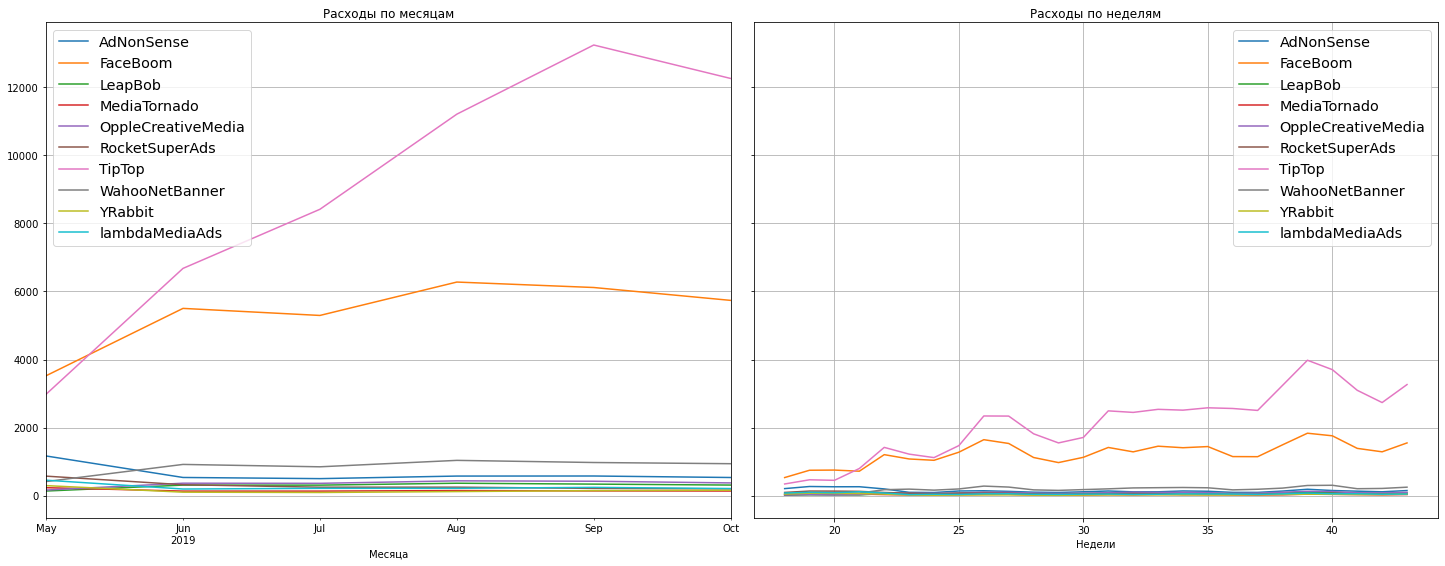

In [37]:
plt.figure(figsize=(30, 15))
ax1 = plt.subplot(2, 3, 1,)
by_month.plot(grid=True, ax=ax1)
plt.legend(fontsize = 'x-large')
plt.xlabel('Месяца')
plt.title('Расходы по месяцам')


ax2 = plt.subplot(2, 3, 2,sharey = ax1)
by_week.plot(grid=True, ax=ax2)
plt.legend(fontsize = 'x-large')
plt.xlabel('Недели')
plt.title('Расходы по неделям')


plt.tight_layout();

Узнать, сколько в среднем стоило привлечение одного пользователя по каждому источнику.

In [38]:
data_costs['dt'] = pd.to_datetime(data_costs['dt']).dt.date
profiles = get_profiles(data_visits, data_orders, data_costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [39]:
cac_from_channel = profiles.query('channel != "organic"')

cac_from_channelk= cac_from_channel.groupby('channel').agg({'acquisition_cost':'mean'}).reset_index().sort_values(by = 'acquisition_cost', ascending = False)
cac_from_channelk

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


Самые высокие средние показатели по расходам у канала TipTop , они в два с половиной раза выше чем у близжайшего конкурента.

Расходы распределялись равномерно для всех каналов по месяцам и неделям,
но самые высокие показатели из них это показатели - OppleCreativeMedia и FaceBoom

Общие расходы на все каналы составили 105 497 рублей, самым затратным оказался канал TipTop , самым не затратным: YRabbit. Средняя стоимость привлечения одного пользователя для канала TipTop составило 2, 8  , YRabbit - 0,21 , что также равно показателям таких каналов как LeapBob	 и MediaTornado. Еще одним дорогостоящим каналом стал FaceBoom, где средняя стоимость одного пользователя составила 1,11, что очень близко к показателям AdNonSense. Расходы росли у таких компаний 
OppleCreativeMedia и FaceBoom.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Создать функцию для LTV, ROI CAC.

In [40]:
def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # мы получаем их через аргументы profiles и purchases
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Присоединить покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # этот столбец мы будем использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']  
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):  
        # Шаг 3. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках сумма покупок пользователей на заданный лайфтайм. Таким образом, мы получим таблицу выручки
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum')         # строим "треугольную таблицу"         
        
        # Шаг 4. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)
        
        # Шаг 5. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        
        # Шаг 6. Разделить каждую ячейку таблицы выручки на соответствующий размер когорты
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты 
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        
        # Шаг 7. Расчитать CAC
        # в таблице df одному пользователю соответствует несколько строк, поэтому 
        # вернемся к уникальным пользователям с помощью drop_duplicates
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = cac.groupby(dims).agg({'acquisition_cost': 'mean'}).rename(columns = {'acquisition_cost': 'cac'})
        
        # Шаг 8. Разделить LTV на CAC
        roi = result.div(cac['cac'], axis = 0)

        # Шаг 9. Исключить из результатов строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        # добавим красивости - починим размеры когорт и добавим в таблицу cac
        # и выведем все в формате cohort_size, cac, все остальные столбцы
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi

    # расчитываем LTV и ROI
    result_grouped, roi_groupped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем LTV и ROI по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь у нас есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы LTV, ROI и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time, roi_groupped, roi_in_time


Задать функцию для конверсии.

In [41]:
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # мы получаем их через аргументы profiles и purchases
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # Шаг 2. Найти дату и время первой покупки, совершенной пользователем
    first_purchases = purchases.sort_values(by = ['user_id', 'event_dt']).groupby('user_id').agg({'event_dt': 'first'}).reset_index()

    # Шаг 3. Присоединить первые покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # этот столбец мы будем использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']  
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):  
        # Шаг 4. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках число уникальных пользовательских идентификаторов - это будет таблица конверсии
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу"         
        
        # Шаг 5. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)
        
        # Шаг 6. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        
        # Шаг 7. Разделить каждую ячейку таблицы конверсии на соответствующий размер когорты
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты 
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем конверсию 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем конверсию по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь у нас есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы конверсии и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

Задать функцию для удержания.

In [42]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

Задать функцию для вычисления скользящего среднего.

In [43]:
def filter_data(df, window):
    # для каждой колонки применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df



Создать функцию для отрисовки удержания.

In [44]:
def plot_retention(retention, retention_history, horizon, window = 7):
    # задаем сетку отрисовки графкиков
    plt.subplots(figsize = (15, 10))
    
    # проверим размер индекса - если в нем только один столбец payer, 
    # то добавим еще один - иначе функция будет ломаться
    # такую процедуру мы с вами делали для расчета конверсии и ltv
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users' 
        retention = retention.reset_index().set_index(['cohort', 'payer']) 
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    retention = retention.drop(columns = ['cohort_size', 0]) 
    retention_history = retention_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # первый график - кривые удержание для платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание платящих пользователей')  
    
    # второй график - кривые удержание для неплатящих пользователей
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid = True, ax = ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание неплатящих пользователей')
    
    # третий график - динамика изменения удержания для платящих пользователей
    ax3 = plt.subplot(2, 2, 3)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты и признака платящих пользователей
    columns = [name for name in retention_history.index.names if name not in ['dt', 'payer']] 
    filtered_data = retention_history.query('payer == True').pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))  
    
    # четвертый график - динамика изменения удержания для неплатящих пользователей
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))   
    
    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout() 
    
    plt.show()

Создать функцию для отрисовки конверсии.

In [45]:
def plot_conversion(conversion, conversion_history, horizon, window = 7):
    # задаем сетку отрисовки графкиков
    plt.subplots(figsize = (15, 10))
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    conversion = conversion.drop(columns = ['cohort_size']) 
    conversion_history = conversion_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # первый график - кривые конверсии
    ax1 = plt.subplot(2, 2, 1)
    conversion.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Конверсия пользователей')  
    
    # второй график - динамика конверсии
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in conversion_history.index.names if name not in ['dt']] 
    filtered_data = conversion_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))  
    
    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout() 
    
    plt.show()


Создать функцию для отрисовки LTV, ROI CAC.

In [46]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 7):
    # задаем сетку отрисовки графкиков
    plt.subplots(figsize = (20, 10))
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    ltv = ltv.drop(columns = ['cohort_size']) 
    ltv_history = ltv_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # запишем CAC в отдельный фрейм
    cac_history = roi_history[['cac']]
    
    roi = roi.drop(columns = ['cohort_size', 'cac']) 
    roi_history = roi_history.drop(columns = ['cohort_size', 'cac'])[[horizon - 1]]
    
    # первый график - кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')  
    
    # второй график - динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in ltv_history.index.names if name not in ['dt']] 
    filtered_data = ltv_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))  
    
    # третий график - динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in cac_history.index.names if name not in ['dt']] 
    filtered_data = cac_history.pivot_table(index = 'dt', columns = columns, values = 'cac', aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')  
    
    # четвертый график - кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid = True, ax = ax4)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')  
    
    # пятый график - динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey = ax4)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты 
    columns = [name for name in roi_history.index.names if name not in ['dt']] 
    filtered_data = roi_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax5)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))  

    plt.tight_layout()
    
    plt.show()

Создать профили.

In [47]:
profiles = get_profiles(data_visits, data_orders, data_costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Удалить из анализа органических пользователей.

In [48]:
profiles = profiles.query('channel != "organic"')

## Построить графики LTV, динамики LTV, CAC,ROI и динамики ROI .

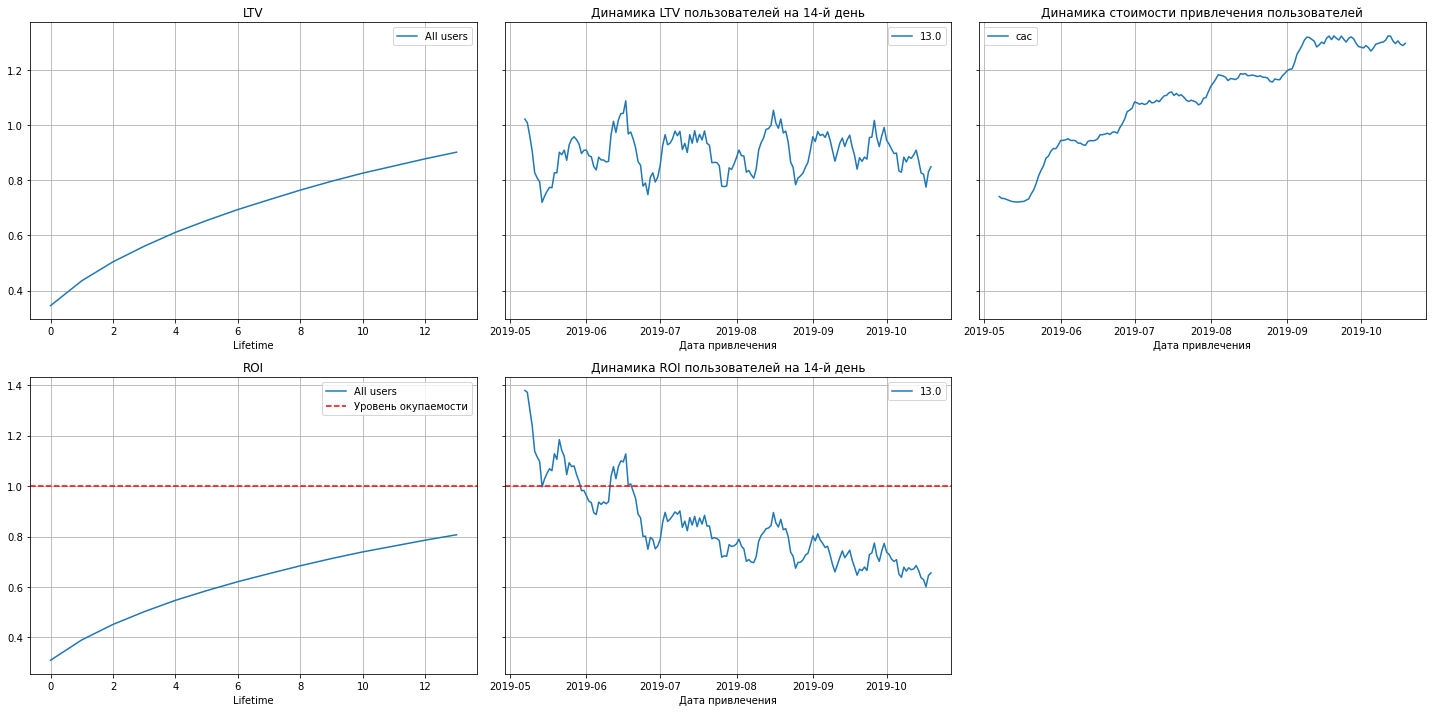

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы:
1. Показатель окупаемости не был достигнут .
2. ЛТВ стабилен , изменяется с сезонностью.
3. САС увеличивается, значит рекламный бюджет растет.

### Построить графики LTV, динамики LTV, CAC,ROI и динамики ROI разбитые по устройствам.

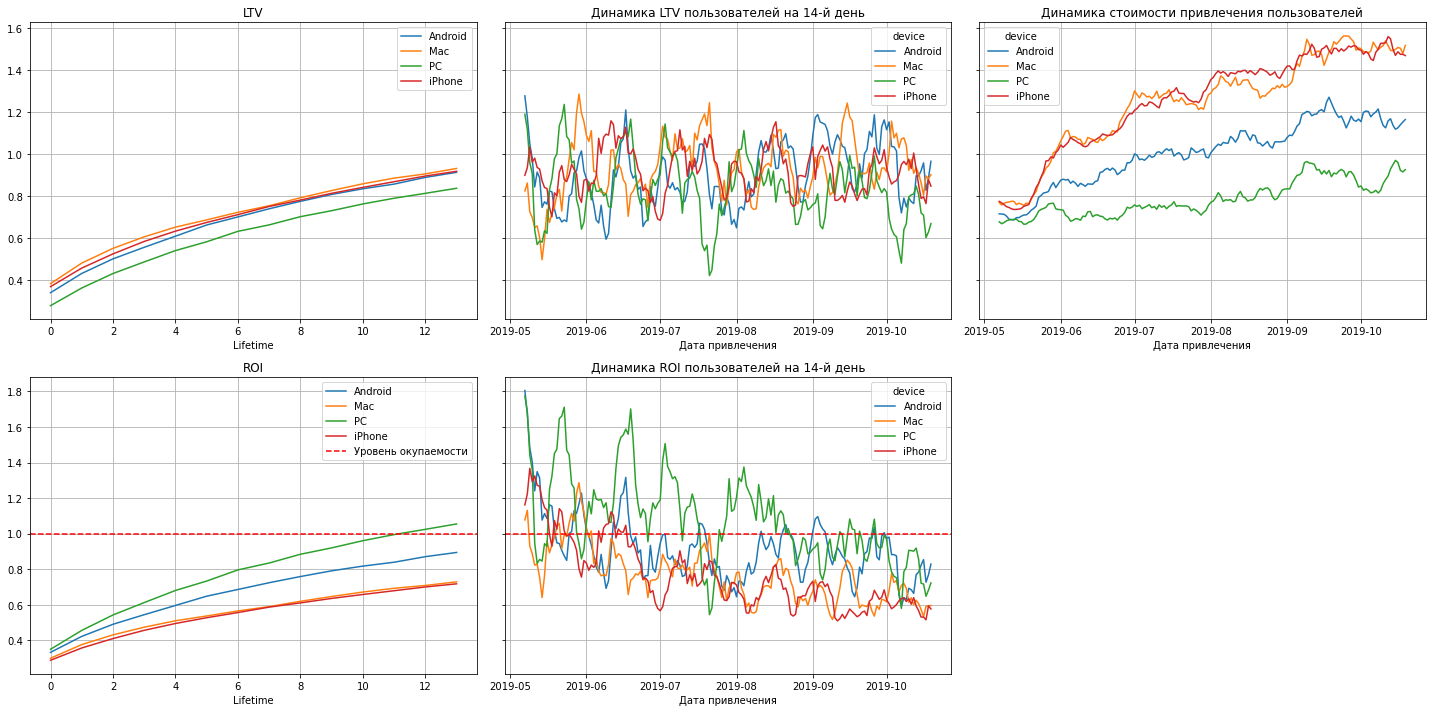

In [50]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days, dimensions = dimensions)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы:
1. Показатель окупаемости достигнут только у PC.
2. ЛТВ стабилен, изменяется с сезонностью.
3. САС увеличивается, значит рекламный бюджет растет. 

### Построить графики удержания и конверсии разбитые по устройствам.

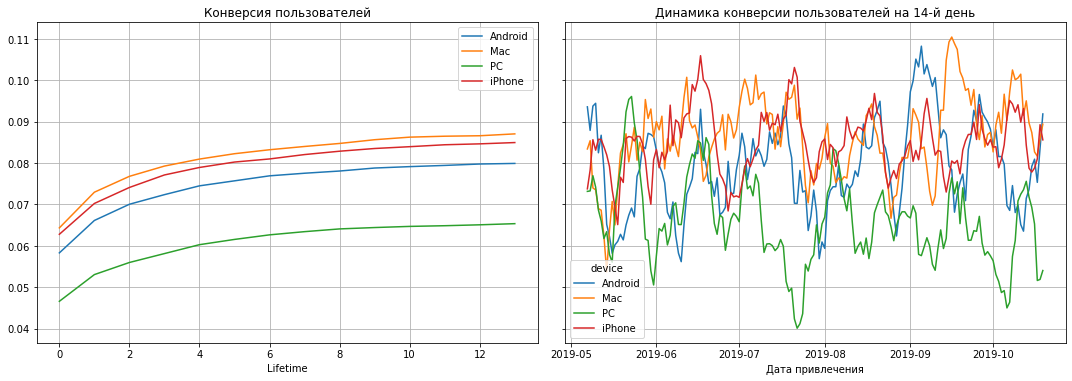

In [51]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days, dimensions = dimensions)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Выводы:
1. Больше всего конвертируются такое устройство как Mac.
2. Самое лучшее удержание - у пользователей PC.
3. Динамика стабильная.

### Построить графики LTV, динамики LTV, CAC,ROI и динамики ROI разбитые по регионам.

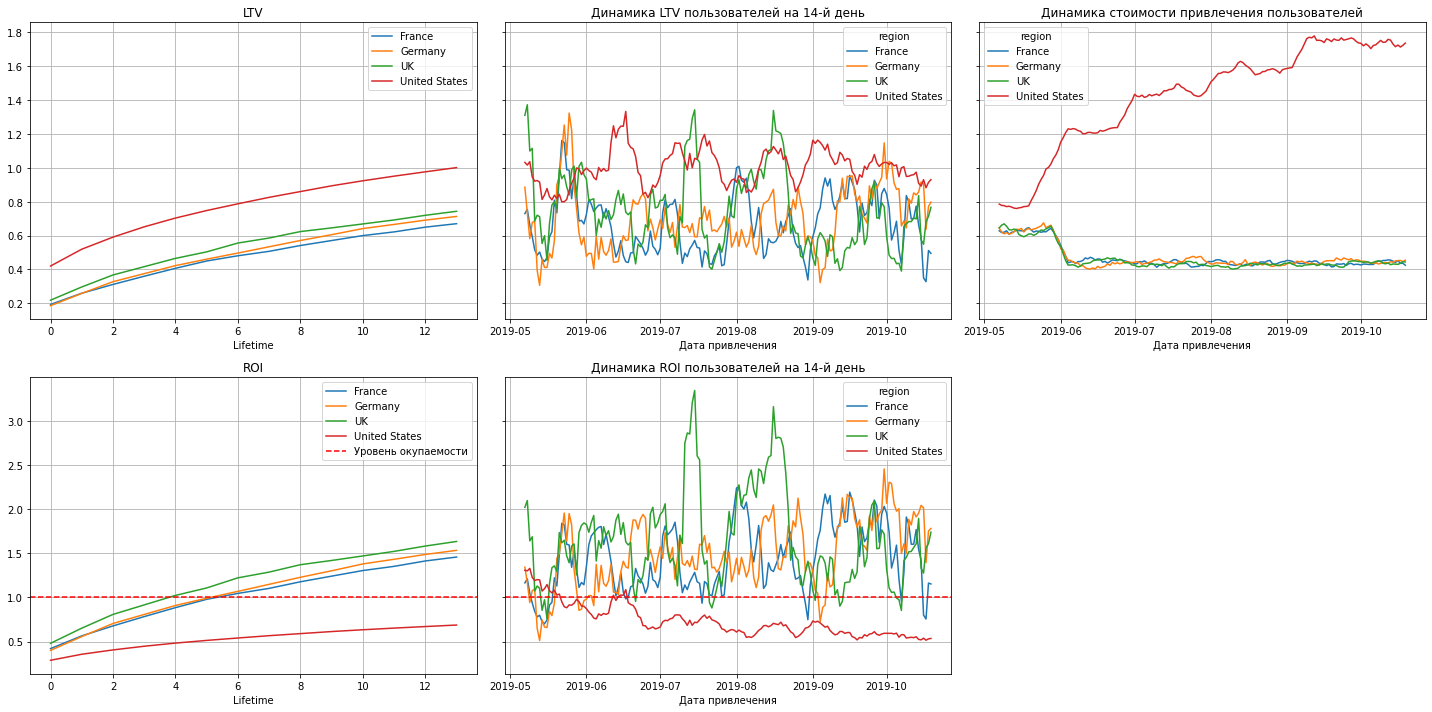

In [52]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days, dimensions = dimensions)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы:
1. Показатель окупаемости не достигнут только у США.
2. ЛТВ стабилен, изменяется с сезонностью.
3. САС увличивается только у Америки, значит рекламный бюджет растет.

### Построить графики удержания и конверсии разбитые по регионам.

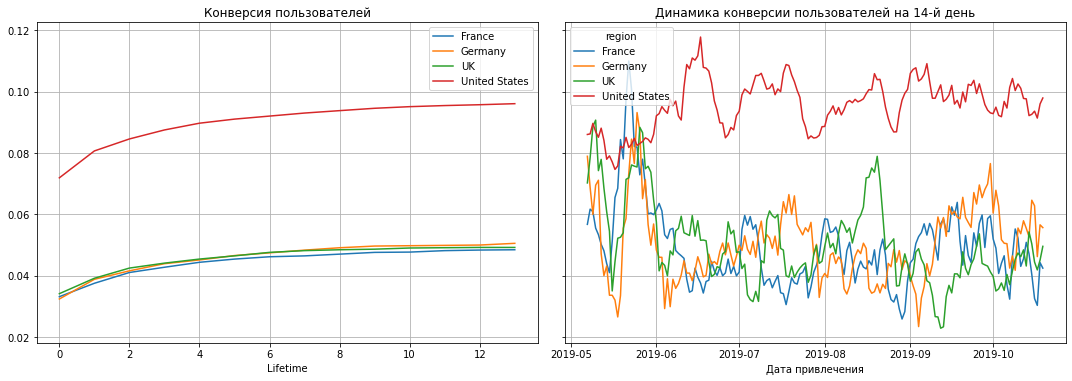

In [53]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days, dimensions = dimensions)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Выводы : 
1. Лучше всего конвертируются США.
2. Самое высокое удержание - у Франции.
3. Динамика стабильная

### Построить графики LTV, динамики LTV, CAC,ROI и динамики ROI разбитые по каналам.

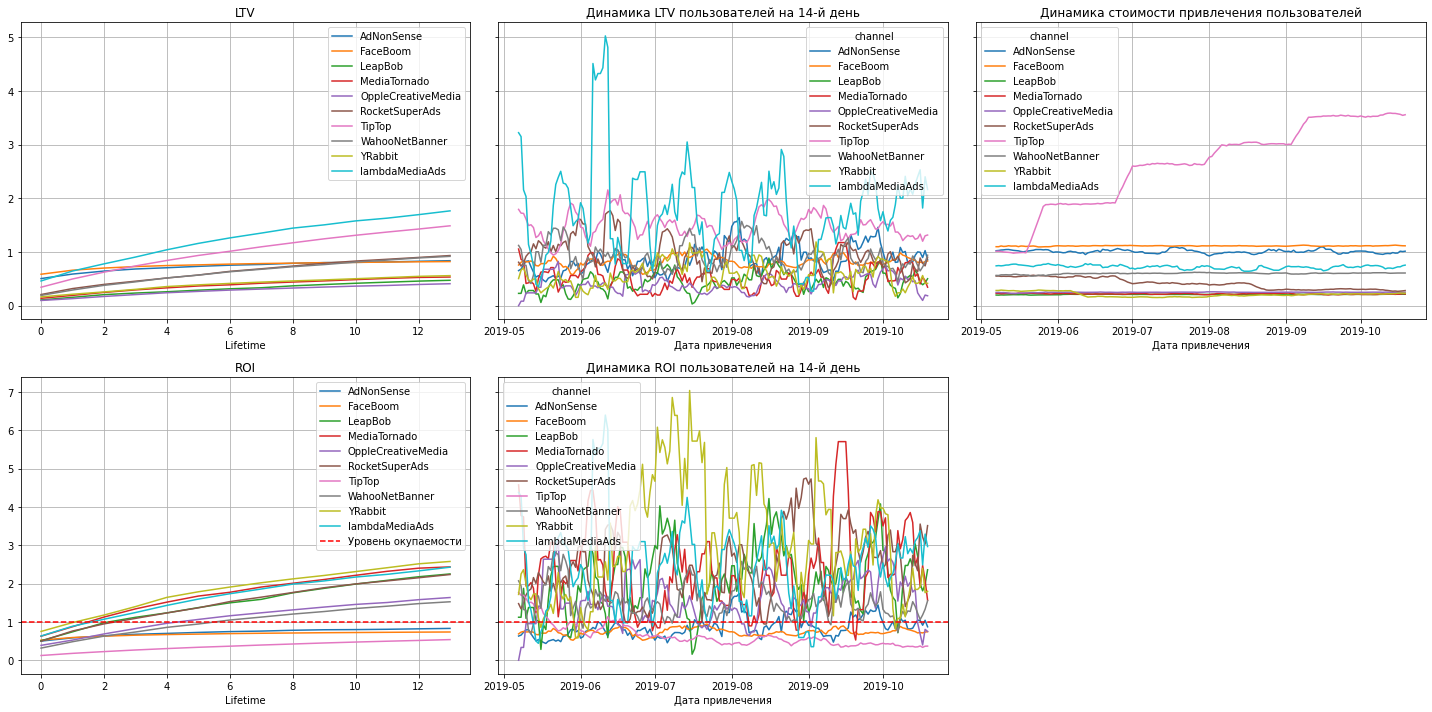

In [54]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days, dimensions = dimensions)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы:
1. Показатель окупаемости не достигнут у FaceBoom , TipTop и AdNonSense.
2. ЛТВ стабилен для всех каналов, изменяется с сезонностью. Немного подскакивает только у канала IamdaMediaAds. Значит 
Возможно ухудшение качества пользователей у этого канала.
3. САС увличивается только у TipTop, значит рекламный бюджет растет.

### Построить графики удержания и конверсии разбитые по каналам.

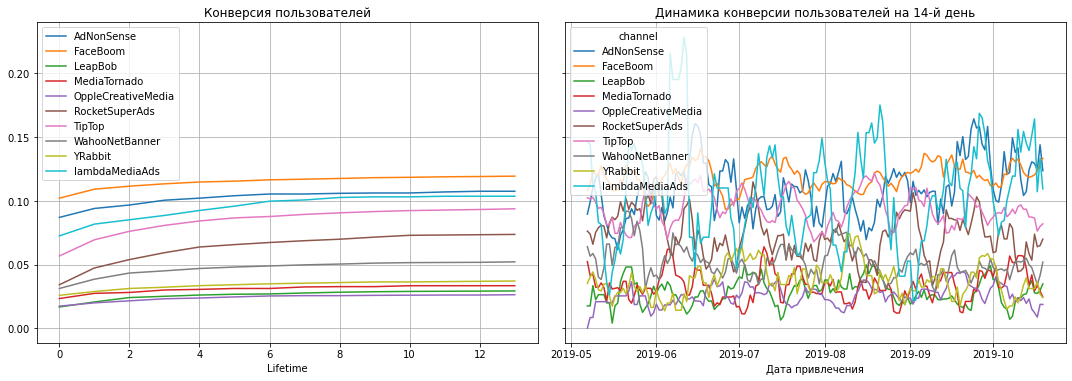

In [55]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(profiles, data_visits, observation_date, horizon_days, dimensions = dimensions)
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)
ltv_raw, ltv_grouped, ltv_history,  roi_grouped, roi_history = get_ltv(profiles, data_orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Выводы:

1.Лучше всего конвертируются FaceBoom.

2.Самое высокое удержание - у OppleCreativeMedia.

3.Динамика стабильная

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

### Общий вывод:

Возможные причины неэффективности привличения пользователей:
1.Окупаемость не происходила для разных типов устройств,всех, кроме пк, из чего можно сделать вывод, что , возможно, причина 
в неудобстве оформления либо оплаты на самом сайте особенно на мобильных устройствах. 
2.Как было выяснено, удержание лучше всего происходило для французских пользователей, а для американских пользователей был самый высокий
показатель совершенных заказов(каждый 15, как мы выснили),для других стран он был существенно ниже,
поэтому , возможно, все дело в самом обустройстве сайта, людям из других стран не так нравится реклама,
 как людям из Америки, поэтому возможная причина - это отсуствие простого и приятного интерфейса на сайте для американских
 пользователей, нужно учесть предпочтения пользователей в этом вопросе.


Рекомендации для отдела маркетинга:
1.стоит обратить внимание на маркетинговую стратегию канала YRabbit, который лидирует по окупаемости среди других каналов, 
не смотря даже на количество привлеченного бюджета (расходы составили 944 рубля)ю
2.Стоит обратить внимание что удержание лучше всего происходит для пользователей пк, поэтому нужно больше инвестировать 
в рекламу именно для этого источника.
2.Стоит обратить внимание что удержание хуже всего происходит для пользователей мобильных устройств и мака, поэтому нужно больше инвестировать 
в разивитие приятного интерфейса и удобного взаимодействия с сайтом на этих носителях.
3.Стоит также обратить внимание на то что удержание лучше для Великобритании , Франции и Германии,
и, так как мы знаем , что самые затратные каналы были из США, можно сделать предположение,
что вложения в рекламу стоит понизить и больший акцент сделать на качественное оформление сайтов и удобство способов оформления и оплаты заказов, а также , возможно, на интересных рекламных ходах в принципе.
